<a href="https://colab.research.google.com/github/ouldsidy/Projets/blob/main/Projet_mise_en_pratique_en_finace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charger et analyser les données

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [9]:
import plotly.offline as py

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Partie 1

Parmi ces 4 données, celles qui seront utilisées sont ajustées en fonction du partage des prix. Ces données contiennent les cours bruts des actions des sociétés cotées de 2010 à 2016. Les données utilisées proviennent de Yahoo Finance

In [3]:
df=pd.read_csv('../content/drive/MyDrive/Colab Notebooks/Projet Mise en pratique Finace/prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df['date']= df['date'].str.split(" ", n = 1, expand = True)[0]
df['date']= pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


On a un ensemble de dsonnées de 851264 lignes et 7 variables qui sont  : L'ouverture et la fermeture représentent les prix d'ouverture et de clôture de l'action par jour (lorsque les marchés ouvrent puis ferment).

Le plus haut et le plus bas représentent le prix le plus élevé/le plus bas de l'action au cours de cette journée.

Le volume est le nombre d'actions échangées ce jour-là

Ces données ont 7 variables.

date = La date à laquelle le cours de l'action est disponible

symbole = symbole de l'entreprise

ouvert = prix initial à cette date

close = prix final à cette date

bas = le prix le plus bas à cette date

high = le prix le plus élevé à cette date

volume = volume des ventes de stocks ce jour-là

In [5]:
print("Starting date : {}".format(df['date'].min()))
print("Ending   date : {}".format(df['date'].max()))

Starting date : 2010-01-04
Ending   date : 2016-12-30 00:00:00


**Symboles de l'entreprise**

In [ ]:
df['symbol'].unique()

In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Puisqu’il n’y a pas de doublons ni de données nulles, le nettoyage des données n’est pas nécessaire pour le processus de régression.

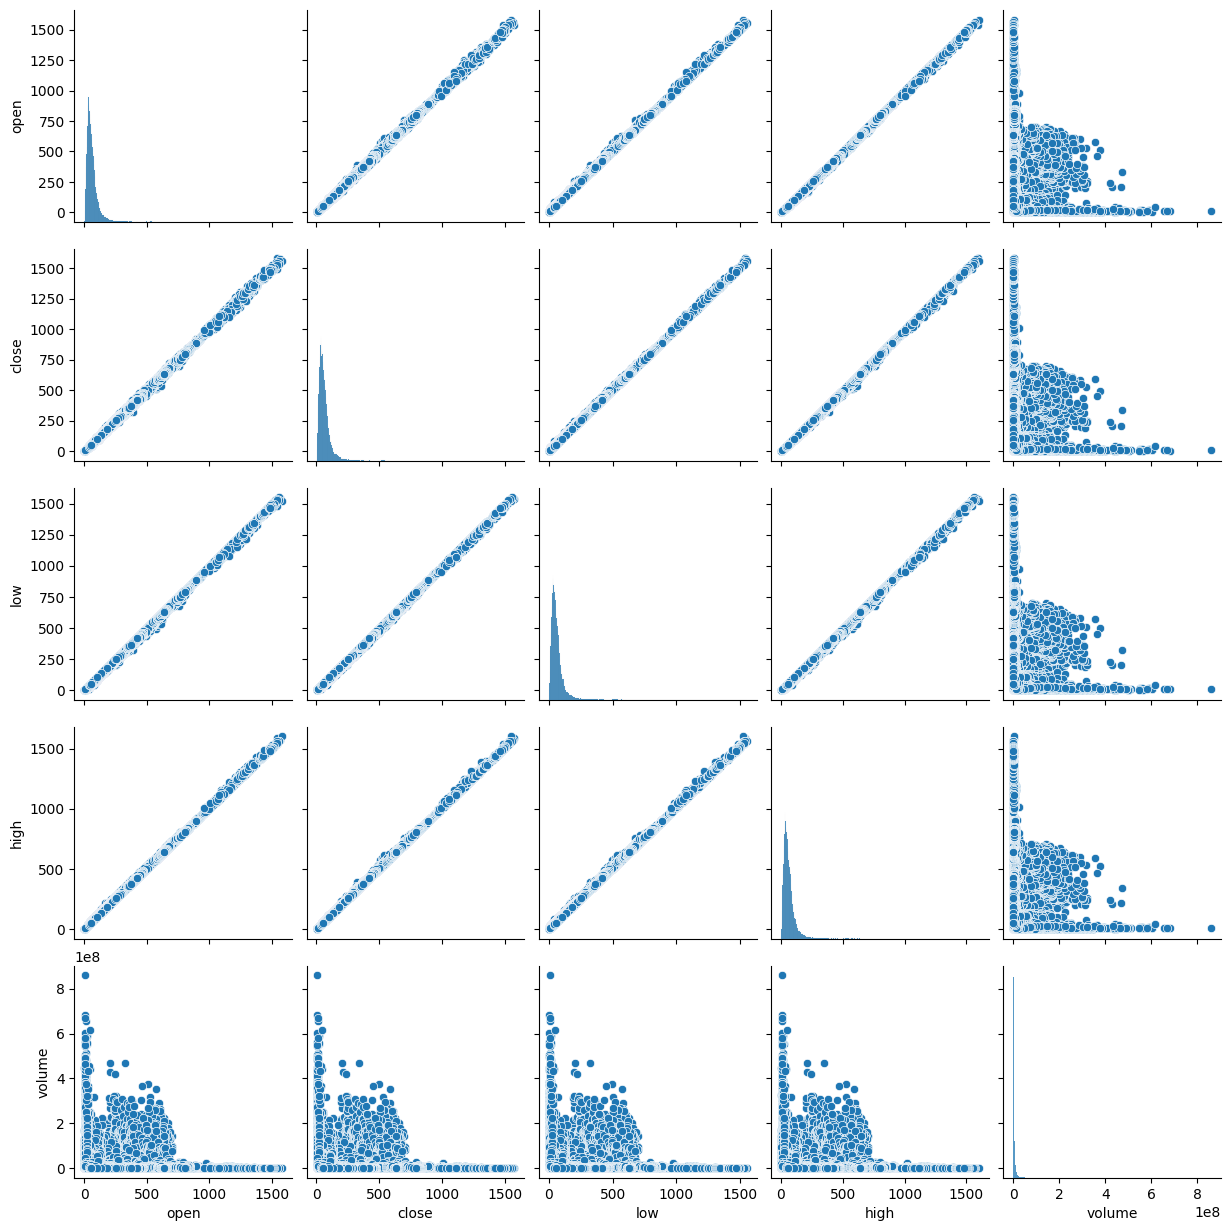

In [ ]:
import seaborn as sns
sns.pairplot(df_1)

**Corrélation**

Cette carte est utilisée pour trouver les corrélations entre variables.

<Axes: >

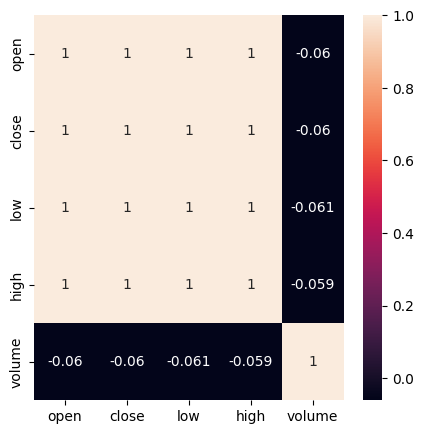

In [ ]:
cormap = df.corr()
fig, ax = mtp.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

On remaque que les variables high, low, colse et open sont fortement corrélées entre elles.

In [ ]:
print("Maximum Stock Volume : \n")
df_1[df_1['volume']==df_1['volume'].max()]

Maximum Stock Volume : 



,date,symbol,open,close,low,high,volume
195050,2011-08-25,BAC,8.29,7.65,7.38,8.8,859643400.0


## Extraire les données boursières de GOOGLE et les analyser

In [7]:
df1=df[df['symbol']=='GOOGL']
df1

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
1844,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2312,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0
...,...,...,...,...,...,...,...
848964,2016-12-23,GOOGL,808.010010,807.799988,805.109985,810.969971,764100.0
849464,2016-12-27,GOOGL,808.679993,809.929993,805.799988,816.000000,974400.0
849964,2016-12-28,GOOGL,813.330017,804.570007,802.440002,813.330017,1199700.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 440 to 850964
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [11]:
data = []
data.append(go.Scatter(x = df1['date'], y = df1['open'].values,name = "Open"))
data.append(go.Scatter(x = df1['date'], y = df1['close'].values,name = "Close" ))
layout = go.Layout(dict(title = "Opening and Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [ ]:
data = []
for asset in ['AMZN','AAPL','GOOGL']:
    asset_df = df_1[(df_1['symbol'] == asset)]

    data.append(go.Scatter(x = asset_df['date'].values, y = asset_df['close'].values,name = asset ))
layout = go.Layout(dict(title = "Closing prices of 3 assets - AMAZON, APPLE, GOOGLE",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

Ici on voit que les cours de google et amazon sont trés colorés en terme d'evolution.

In [12]:
data = []
data.append(go.Scatter(x = df1['date'], y = df1['volume'].values,name = "Volume"))
layout = go.Layout(dict(title = "Volume of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Volume'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [13]:
data = []
for asset in ['AMZN','AAPL','GOOGL']:
    asset_df = df[(df['symbol'] == asset)]

    data.append(go.Scatter(x = asset_df['date'].values, y = asset_df['volume'].values,name = asset ))
layout = go.Layout(dict(title = "Volume of 3 assets - AMAZON, APPLE, GOOGLE",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Volume'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [ ]:
df['price_diff'] = df['close'] - df['open']
grouped = df.groupby('date').agg({'price_diff': ['std', 'min']}).reset_index()

In [ ]:
print(f"Average standard deviation of price change within a day in {grouped['price_diff']['std'].mean():.4f}.")

Average standard deviation of price change within a day in 1.1954.


In [ ]:
df1.drop(['symbol'], axis=1, inplace=True)

<ipython-input-15-8be285d728fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['symbol'], axis=1, inplace=True)


## Modélisation

In [ ]:
X=df1[['date','volume','open']]
y=df1['close']

In [ ]:
x = df1[["open","low","high"]]
y = df1["close"]

Pour construire notre modèle, on prend les 1000 premiers jours pour l'entrainement et on prrend le reste de notre série temporelle, pour prédire chaque jour la valeur.

In [ ]:
XX_train = X[:1000]
XX_test = X[1000:]

y_train = y[:1000]
y_test = y[1000:]

In [ ]:
X_train = XX_train[['volume','open']]
X_test = XX_test[['volume','open']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [ ]:
XX_test

,date,volume,open,prediction,close
474211,2013-12-23,3439700.0,1107.840040,1108.483763,1115.099985
474701,2013-12-24,1466900.0,1114.969988,1116.264188,1111.840064
475191,2013-12-26,2672900.0,1114.010011,1114.906812,1117.460049
475681,2013-12-27,3136200.0,1119.999987,1120.744583,1118.400026
476171,2013-12-30,2469700.0,1120.339979,1121.304185,1109.460000
...,...,...,...,...,...
848964,2016-12-23,764100.0,808.010010,809.513489,807.799988
849464,2016-12-27,974400.0,808.679993,810.114235,809.929993
849964,2016-12-28,1199700.0,813.330017,814.690369,804.570007
850464,2016-12-29,1056500.0,802.330017,803.736750,802.880005


### Régression linéaire

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

In [ ]:
pred_df = pd.DataFrame(pred,y_test.index,['prediction'])
y_test = pd.DataFrame(y_test,y_test.index,['close'])

XX_test = XX_test.join(pred_df)
XX_test = XX_test.join(y_test)

In [ ]:
data = []
data.append(go.Scatter(x = XX_test['date'], y = XX_test['prediction'].values,name = "Prediction"))
data.append(go.Scatter(x = XX_test['date'], y = XX_test['close'].values,name = "Actual" ))
layout = go.Layout(dict(title = "Predicted and Actual Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

# LSTM

In [14]:
X=df1[['open']]
y=df1['close']
dates = df1['date']
length=100

In [15]:
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
test_dates = dates[1000:]

In [16]:
maxOpen = max(training_set)
minOpen = min(training_set)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

Création d'un modèle avec 100 étapes temporelles et 1 sortie
La prévision du prix de proximité dépendrait des 100 jours précédents

In [17]:
X_train = []
y_train = []

for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 19s 318ms/step - loss: 0.0249 - val_loss: 0.0022
Epoch 2/100
29/29 [==============================] - 6s 221ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 3/100
29/29 [==============================] - 9s 306ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 4/100
29/29 [==============================] - 6s 207ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 5/100
29/29 [==============================] - 8s 270ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 6/100
29/29 [==============================] - 7s 230ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 7/100
29/29 [==============================] - 8s 292ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 8/100
29/29 [==============================] - 6s 211ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 9/100
29/29 [==============================] - 9s 301ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 10/100
29/29 [==============================] - 6s 209ms/step - loss: 0.0040 - val_l

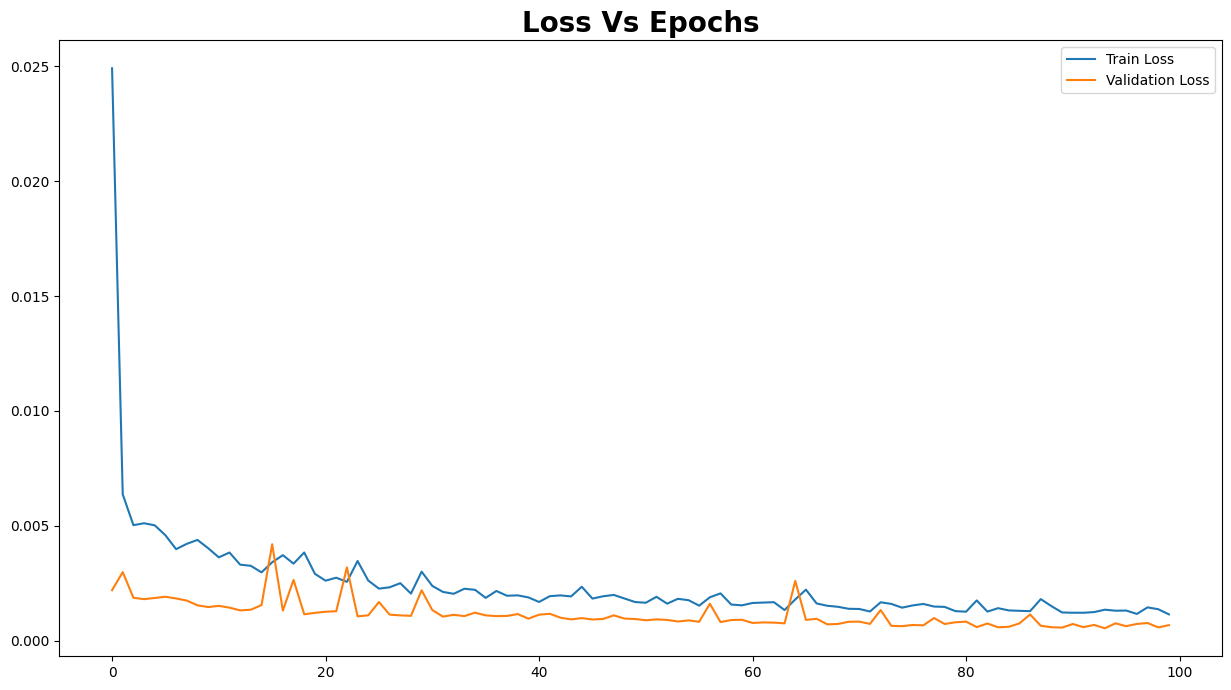

In [19]:
loss = pd.DataFrame()

fig=plt.figure(figsize=(15,8))
plt.title("Loss Vs Epochs", size=20, weight='bold')

plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend(loc='best')

plt.show()

In [20]:
pred=model.predict(X_test)

21/21 [==============================] - 4s 49ms/step


In [21]:
y_test = y_test.reshape(-1, 1)

sc = MinMaxScaler(feature_range = (minOpen, maxOpen))
pred_scaled = sc.fit_transform(pred)
y_test_scaled=sc.transform(y_test)

In [22]:
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test_scaled.flatten()
test['pred']=pred_scaled.flatten()
test

,test,pred
0,500.908092,529.739929
1,523.351938,524.251343
2,529.205150,520.284973
3,547.975617,520.878601
4,559.944313,527.570374
...,...,...
657,1064.285208,1046.953491
658,1065.637456,1043.370972
659,1075.022750,1040.671143
660,1052.821094,1041.475342


In [25]:
r2 = r2_score(y_test_scaled,pred_scaled)
mse = mean_squared_error(y_test_scaled,pred_scaled)
mae = mean_squared_error(y_test_scaled,pred_scaled)

print('R2 Score : ',r2)
print('Mean Squared error : ',mse)
print('Mean Absolute error :',mae)

R2 Score :  0.9720545640925209
Mean Squared error :  1171.733649651495
Mean Absolute error : 1171.733649651495


In [26]:
data = []
data.append(go.Scatter(x = test_dates, y = test['pred'].values,name = "Prediction"))
data.append(go.Scatter(x = test_dates, y = test['test'].values,name = "Actual" ))
layout = go.Layout(dict(title = "Predicted and Actual Closing prices of GOOGLE asset",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Price'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

J'ai donné la prédiction avec un seul stock, je ne peux pas dire je ne pourrais pas dire tours les jours ce qui ce passe